In [1]:
# to read and wrangle data
import pandas as pd

# to import data from LA Data portal
from sodapy import Socrata

# to create spatial data
import geopandas as gpd

# for basemaps
import contextily as ctx

# Graphics
import matplotlib.pyplot as plt
import plotly.express as px

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df = gpd.read_file('acs2019_5yr_B05015_14000US06037222001.geojson')

In [4]:
dft = gpd.read_file('acs2019_5yr_B01003_14000US06037222001.geojson')




In [5]:
gdf = pd.merge(df, dft)

In [6]:
gdf.head()

,geoid,name,B05015001,"B05015001, Error",B05015002,"B05015002, Error",B05015003,"B05015003, Error",B05015004,"B05015004, Error",B05015005,"B05015005, Error",B05015006,"B05015006, Error",B05015007,"B05015007, Error",B05015008,"B05015008, Error",B05015009,"B05015009, Error",B05015010,"B05015010, Error",B05015011,"B05015011, Error",B05015012,"B05015012, Error",B05015013,"B05015013, Error",B05015014,"B05015014, Error",B05015015,"B05015015, Error",B05015016,"B05015016, Error",B05015017,"B05015017, Error",B05015018,"B05015018, Error",B05015019,"B05015019, Error",B05015020,"B05015020, Error",B05015021,"B05015021, Error",B05015022,"B05015022, Error",B05015023,"B05015023, Error",B05015024,"B05015024, Error",B05015025,"B05015025, Error",B05015026,"B05015026, Error",B05015027,"B05015027, Error",B05015028,"B05015028, Error",B05015029,"B05015029, Error",B05015030,"B05015030, Error",B05015031,"B05015031, Error",geometry,B01003001,"B01003001, Error"
0,05000US06037,"Los Angeles County, CA",3430507.0,14119.0,288054.0,4584.0,76162.0,2634.0,211892.0,3307.0,17332.0,1150.0,1356.0,370.0,15976.0,1018.0,12687.0,1417.0,2696.0,625.0,9991.0,1063.0,269579.0,5369.0,34555.0,2079.0,235024.0,4902.0,175586.0,4234.0,22808.0,1860.0,152778.0,3838.0,62139.0,2507.0,21956.0,1516.0,40183.0,2009.0,1277142.0,9235.0,65416.0,2586.0,1211726.0,9151.0,239804.0,4648.0,31931.0,1783.0,207873.0,3909.0,98409.0,2465.0,10841.0,1076.0,87568.0,2277.0,989775.0,8062.0,173834.0,3797.0,815941.0,6993.0,"MULTIPOLYGON (((-118.70339 34.16859, -118.7033...",10081570.0,0.0
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",1424.0,326.0,13.0,25.0,0.0,12.0,13.0,25.0,8.0,13.0,0.0,12.0,8.0,13.0,0.0,12.0,0.0,12.0,0.0,12.0,11.0,16.0,0.0,12.0,11.0,16.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,310.0,218.0,26.0,37.0,284.0,193.0,172.0,94.0,61.0,92.0,111.0,64.0,0.0,12.0,0.0,12.0,0.0,12.0,910.0,256.0,130.0,79.0,780.0,249.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009...",4283.0,443.0
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",810.0,180.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,18.0,28.0,9.0,15.0,9.0,14.0,24.0,45.0,0.0,12.0,24.0,45.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,78.0,94.0,0.0,12.0,78.0,94.0,0.0,12.0,0.0,12.0,0.0,12.0,690.0,149.0,36.0,36.0,654.0,140.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033...",3405.0,334.0
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",3167.0,438.0,0.0,17.0,0.0,17.0,0.0,17.0,0.0,17.0,0.0,17.0,0.0,17.0,53.0,48.0,0.0,17.0,53.0,48.0,226.0,175.0,0.0,17.0,226.0,175.0,259.0,228.0,73.0,113.0,186.0,141.0,0.0,17.0,0.0,17.0,0.0,17.0,499.0,264.0,0.0,17.0,499.0,264.0,76.0,105.0,0.0,17.0,76.0,105.0,0.0,17.0,0.0,17.0,0.0,17.0,2054.0,299.0,198.0,182.0,1856.0,279.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979...",6347.0,484.0
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1749.0,251.0,0.0,12.0,0.0,12.0,0.0,12.0,29.0,31.0,0.0,12.0,29.0,31.0,36.0,56.0,0.0,12.0,36.0,56.0,54.0,72.0,25.0,40.0,29.0,34.0,82.0,77.0,0.0,12.0,82.0,77.0,15.0,20.0,0.0,12.0,15.0,20.0,334.0,126.0,0.0,12.0,334.0,126.0,79.0,46.0,12.0,18.0,67.0,43.0,0.0,12.0,0.0,12.0,0.0,12.0,1120.0,252.0,147.0,118.0,973.0,226.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859...",3702.0,276.0


In [7]:
#Dropping margin for error

gdf = gdf.drop(columns=['B05015001, Error', 
                 'B05015002, Error', 
                 'B05015003, Error', 
                 'B05015004, Error', 
                 'B05015005, Error', 
                 'B05015006, Error', 
                 'B05015007, Error', 
                 'B05015008, Error', 
                 'B05015009, Error', 
                 'B05015010, Error', 
                 'B05015011, Error',
                 'B05015012, Error', 
                 'B05015013, Error', 
                 'B05015014, Error',
                 'B05015015, Error',
                 'B05015016, Error',
                 'B05015017, Error',
                 'B05015018, Error',
                 'B05015019, Error',
                 'B05015020, Error',
                 'B05015021, Error',
                 'B05015022, Error',
                 'B05015023, Error',
                 'B05015024, Error',
                 'B05015025, Error',
                 'B05015026, Error',
                 'B05015027, Error',
                 'B05015028, Error',
                 'B05015029, Error',
                 'B05015030, Error',
                 'B05015031, Error',
                 'B01003001, Error'])

In [8]:
#Renaming our columns

gdf.columns = [
 'geoid',
 'name',
 'Total Foreign Born',
 'China, Hong Kong, Taiwan',
 'China et al Entered 2010 or later',
 'China et al Before 2010',
 'Cuba',
 'Cuba Entered 2010 or later',
 'Cuba Entered Before 2010',
 'Dominican Republic',
 'D.R. Entered 2010 or later',
 'D.R. Entered Before 2010',
 'El Salvador',
 'E.S. Entered 2010 or later',
 'E.S. Entered Before 2010',        
 'Guatemala',
 'Guatemala Entered 2010 or later',
 'Guatemala Entered Before 2010',   
 'India',
 'India Entered 2010 or later',
 'India Entered Before 2010', 
 'Mexico',
 'Mexico Entered 2010 or later',
 'Mexico Entered Before 2010', 
 'Philippines',
 'Philippines Entered 2010 or later',
 'Philippines Entered Before 2010', 
 'Vietnam',
 'Vietnam Entered 2010 or later',
 'Vietnam Entered Before 2010', 
 'All Other Countries',
 'A.O.C. Entered 2010 or later',
 'A.O.C. Entered Before 2010', 
 'geometry',
 'Total Population']

In [9]:
gdf.head()

,geoid,name,Total Foreign Born,"China, Hong Kong, Taiwan",China et al Entered 2010 or later,China et al Before 2010,Cuba,Cuba Entered 2010 or later,Cuba Entered Before 2010,Dominican Republic,D.R. Entered 2010 or later,D.R. Entered Before 2010,El Salvador,E.S. Entered 2010 or later,E.S. Entered Before 2010,Guatemala,Guatemala Entered 2010 or later,Guatemala Entered Before 2010,India,India Entered 2010 or later,India Entered Before 2010,Mexico,Mexico Entered 2010 or later,Mexico Entered Before 2010,Philippines,Philippines Entered 2010 or later,Philippines Entered Before 2010,Vietnam,Vietnam Entered 2010 or later,Vietnam Entered Before 2010,All Other Countries,A.O.C. Entered 2010 or later,A.O.C. Entered Before 2010,geometry,Total Population
0,05000US06037,"Los Angeles County, CA",3430507.0,288054.0,76162.0,211892.0,17332.0,1356.0,15976.0,12687.0,2696.0,9991.0,269579.0,34555.0,235024.0,175586.0,22808.0,152778.0,62139.0,21956.0,40183.0,1277142.0,65416.0,1211726.0,239804.0,31931.0,207873.0,98409.0,10841.0,87568.0,989775.0,173834.0,815941.0,"MULTIPOLYGON (((-118.70339 34.16859, -118.7033...",10081570.0
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",1424.0,13.0,0.0,13.0,8.0,0.0,8.0,0.0,0.0,0.0,11.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,310.0,26.0,284.0,172.0,61.0,111.0,0.0,0.0,0.0,910.0,130.0,780.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009...",4283.0
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",810.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,9.0,9.0,24.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78.0,0.0,78.0,0.0,0.0,0.0,690.0,36.0,654.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033...",3405.0
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",3167.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,0.0,53.0,226.0,0.0,226.0,259.0,73.0,186.0,0.0,0.0,0.0,499.0,0.0,499.0,76.0,0.0,76.0,0.0,0.0,0.0,2054.0,198.0,1856.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979...",6347.0
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1749.0,0.0,0.0,0.0,29.0,0.0,29.0,36.0,0.0,36.0,54.0,25.0,29.0,82.0,0.0,82.0,15.0,0.0,15.0,334.0,0.0,334.0,79.0,12.0,67.0,0.0,0.0,0.0,1120.0,147.0,973.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859...",3702.0


In [20]:
# Ok let's take a stab at making a function to trim our data to give us the above table for each station

def stn_trim(stationname,geoid1,geoid2,geoid3,geoid4): 
    # Using .isin to single out the rows we want
    df = gdf[gdf["geoid"].isin([geoid1,geoid2,geoid3,geoid4])] 
    
    # Creating our sum row
    df = df.append(df.sum(numeric_only=True), ignore_index=True)

    # Keeping only summation row
    df = df.iloc[-1:]
    
    # Creating percentages
    df['Percent From China, Hong Kong, Taiwan'] = df['China, Hong Kong, Taiwan']/df['Total Foreign Born']*100
    df['Percent From China et al Entered 2010 or later'] = df['China et al Entered 2010 or later']/df['Total Foreign Born']*100
    df['Percent From China et al Before 2010'] = df['China et al Before 2010']/df['Total Foreign Born']*100
    df['Percent From Cuba'] = df['Cuba']/df['Total Foreign Born']*100
    df['Percent From Cuba Entered 2010 or later'] = df['Cuba Entered 2010 or later']/df['Total Foreign Born']*100
    df['Percent From Cuba Entered Before 2010'] = df['Cuba Entered Before 2010']/df['Total Foreign Born']*100
    df['Percent From Dominican Republic'] = df['Dominican Republic']/df['Total Foreign Born']*100
    df['Percent From D.R. Entered 2010 or later'] = df['D.R. Entered 2010 or later']/df['Total Foreign Born']*100
    df['Percent From D.R. Entered Before 2010'] = df['D.R. Entered Before 2010']/df['Total Foreign Born']*100
    df['Percent From El Salvador'] = df['El Salvador']/df['Total Foreign Born']*100
    df['Percent From E.S. Entered 2010 or later'] = df['E.S. Entered 2010 or later']/df['Total Foreign Born']*100
    df['Percent From E.S. Entered Before 2010'] = df['E.S. Entered Before 2010']/df['Total Foreign Born']*100
    df['Percent From Guatemala'] = df['Guatemala']/df['Total Foreign Born']*100
    df['Percent From Guatemala Entered 2010 or later'] = df['Guatemala Entered 2010 or later']/df['Total Foreign Born']*100
    df['Percent From Guatemala Entered Before 2010'] = df['Guatemala Entered Before 2010']/df['Total Foreign Born']*100
    df['Percent From India'] = df['India']/df['Total Foreign Born']*100
    df['Percent From India Entered 2010 or later'] = df['India Entered 2010 or later']/df['Total Foreign Born']*100
    df['Percent From India Entered Before 2010'] = df['India Entered Before 2010']/df['Total Foreign Born']*100
    df['Percent From Mexico'] = df['Mexico']/df['Total Foreign Born']*100
    df['Percent From Mexico Entered 2010 or later'] = df['Mexico Entered 2010 or later']/df['Total Foreign Born']*100
    df['Percent From Mexico Entered Before 2010'] = df['Mexico Entered Before 2010']/df['Total Foreign Born']*100
    df['Percent From Philippines'] = df['Mexico']/df['Total Foreign Born']*100
    df['Percent From Philippines Entered 2010 or later'] = df['Philippines Entered 2010 or later']/df['Total Foreign Born']*100
    df['Percent From Philippines Entered Before 2010'] = df['Philippines Entered Before 2010']/df['Total Foreign Born']*100
    df['Percent From Vietnam'] = df['Vietnam']/df['Total Foreign Born']*100
    df['Percent From Vietnam Entered 2010 or later'] = df['Vietnam Entered 2010 or later']/df['Total Foreign Born']*100
    df['Percent From Vietnam Entered Before 2010'] = df['Vietnam Entered Before 2010']/df['Total Foreign Born']*100
    df['Percent From All Other Countries'] = df['All Other Countries']/df['Total Foreign Born']*100
    df['Percent From A.O.C. Entered 2010 or later'] = df['A.O.C. Entered 2010 or later']/df['Total Foreign Born']*100
    df['Percent From A.O.C. Entered Before 2010'] = df['A.O.C. Entered Before 2010']/df['Total Foreign Born']*100

    #Keeping only the Country totals for now
    df = df[['Percent From China, Hong Kong, Taiwan', 
             'Percent From Cuba', 
             'Percent From Dominican Republic', 
             'Percent From El Salvador', 
             'Percent From Guatemala', 
             'Percent From India', 
             'Percent From Mexico', 
             'Percent From Philippines', 
             'Percent From Vietnam', 
             'Percent From All Other Countries']]
        
        
    # Flipping rows and columns
    df = df.transpose()
    
    # Reseting index
    df = df.reset_index()
    
    # Renaming columns
    df.columns = ['Country of Origin', 'Percentage']
    
    display(df)
    
    # Plotting
    
    graph = px.bar(df, x="Country of Origin", y="Percentage", 
                    title=stationname + " " + "Station Foreign Born Population Breakdown"
        )
    
    display(graph)


,Country of Origin,Percentage
0,"Percent From China, Hong Kong, Taiwan",31.631342
1,Percent From Cuba,0.192678
2,Percent From Dominican Republic,0.000000
3,Percent From El Salvador,3.114965
4,Percent From Guatemala,0.000000
5,Percent From India,6.326268
6,Percent From Mexico,5.330764
7,Percent From Philippines,5.330764
8,Percent From Vietnam,0.353243
9,Percent From All Other Countries,48.972383


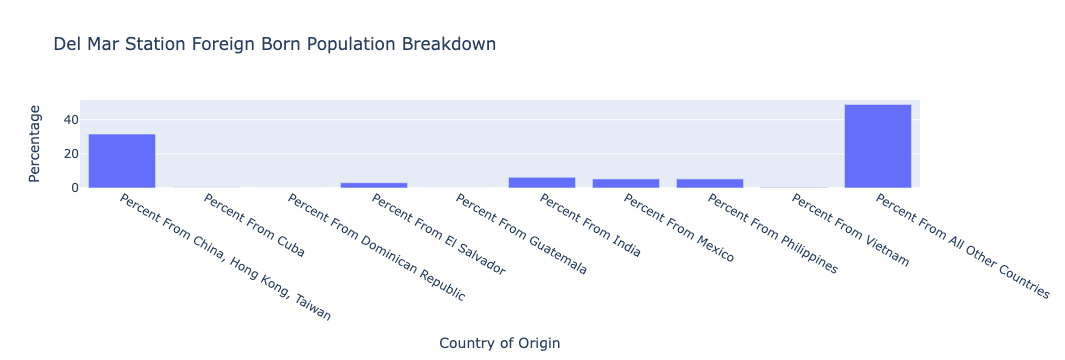

In [21]:
stn_trim(stationname = 'Del Mar',geoid1 = '14000US06037461902',geoid2 = '14000US06037463602',geoid3 = '14000US06037463700',geoid4 = ' ') 

,Country of Origin,Percentage
0,"Percent From China, Hong Kong, Taiwan",47.137030
1,Percent From Cuba,0.090648
2,Percent From Dominican Republic,0.120864
3,Percent From El Salvador,4.743919
4,Percent From Guatemala,2.356851
5,Percent From India,0.120864
6,Percent From Mexico,20.985043
7,Percent From Philippines,20.985043
8,Percent From Vietnam,6.118749
9,Percent From All Other Countries,16.452636


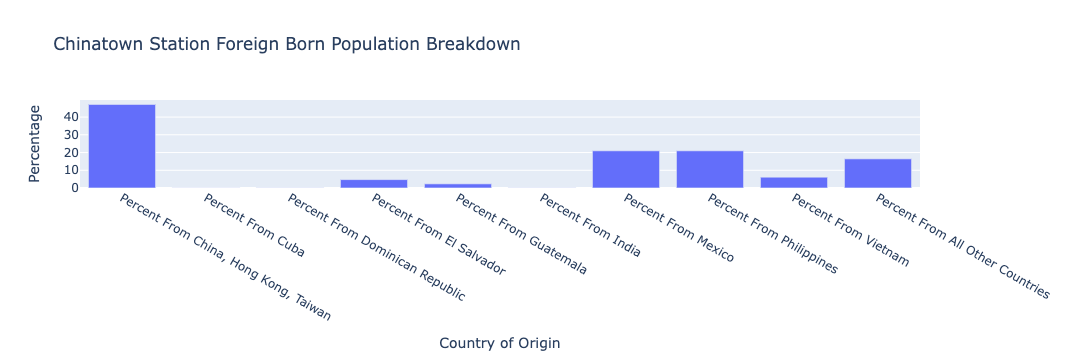

In [22]:
stn_trim(stationname = 'Chinatown',geoid1 = '14000US06037206010',geoid2 = '14000US06037207103',geoid3 = '14000US06037207102',geoid4 = '14000US06037206020')